# Chapter 8 - Modern Convolutional Neural Networks

In this chapter, most sections correspond to a significant CNN architecture that was at some point the base model upon which many research projects and deployed systems were built.

## 8.1. Deep Convolutional Neural Network (AlexNet)

Although the inputs to convolutional networks consist of raw or lightly-processed (e.g., by centering) pixel values, practitioners would never feed raw pixels into traditional models. Instead, typical computer vision pipelines consisted of manually engineering feature extraction pipelines, such as SIFT, SURF, and bags of visual words. Rather than *learning* the features, the features were *crafted*.



In [1]:
import torch
import torch.nn as nn

from d2l import torch as d2l

### 8.1.1. Representation Learning

The most important part of the pipeline was the representation. Up until 2012 the representation was calculated mostly mechanically. SIFT (Scale-Invariant Feature Transform), SURF (Speeded-Up Robust Features), HOG (Histogram of Oriented Gradients), bags of visual words, and similar feature extractors ruled the roost.

The first modern CNN, *AlexNet*, is largely an evolutionary improvement over LeNet. In the lowest layers of the network, the AlexNet model learned feature extractors that resembled some traditional filters. The figure below shows lower-level image descriptors. Higher layers in the network might build upon these representations to represent larger structures, like eyes, noses, blades of grass, etc. Even higher layers may represent whole objects like people, airplanes, dogs, or frisbees. Ultimately, the final hidden state learns a compact representation of the image that summarizes its contents such that data belonging to differnt categories can be easily separated.

![](../imgs/ch08/filters.png)

#### 8.1.1.1. Missing Ingredient: Data

Deep models with many layers require large amounts of data in order to enter the regime where they significantly outperform traditional methods based on convex optimizations (e.g., linear and kernel methods).

Modern datasets:
1. ImageNet
2. CIFAR-100
3. LARGE SCALE VISUAL RECOGNITION CHALLENGE (ILSVRC)
4. LAION-5B

#### 8.1.1.2. Missing Ingredient: Hardware

Deep learning models are voracious consumers of compute cycles. Training can take hundreds of epochs, and each iteration requires passing data through many layers of computationally expensive linear algebra operations.

GPUs are the workhorse of deep learning. They were originally designed for graphics processing, which requires performing the same computation on thousands of pixels at once. This is exactly the kind of operation we need to perform in deep learning, where we replace pixels with neurons, images with mini-batches, and model parameters with tensors.

### 8.1.2. AlexNet

AlexNet, which employs an 8-layer CNN, shows that the featurse obtained by learning can transcend manually-designed features.

The architecture of AlexNet is similar to LeNet, as shown in the figure below. The left is LeNet and the right is AlexNet.

![](../imgs/ch08/alexnet.svg)

The differences between AlexNet and LeNet are as follows:
1. AlexNet is much deeper than LeNet-5. AlexNet consists of 8 layers: 5 convolutional layers and 3 fully-connected layers.
2. AlexNet uses ReLU instead of sigmoid as the activation function.

#### 8.1.2.1. Architecture

In AlexNet's first layer, the convolution window shape is $11\times 11$. Since images in ImageNet are 8 times larger than the MNIST images.

The convolution window shape in the scond layer is reduced to %5\times 5$, followed by $3\times 3$.

After the 1st, 2nd, and 5th convolutional layers, the network adds max-pooling layers with a window shape of $3\times 3$ and a stride of 2.

AlexNet has 10 times more convolution channels than LeNet.

After the final convolutional layer, there are two huge fully connected layers with 4096 outputs. These layers require nearly 1GB model parameters.

#### 8.1.2.2. Activation Functions

The computation of the ReLU activation function is simpler. In addition, the ReLU activation function makes model training easier when using different parameter initialization methods, because of the easy gradient calculation.

#### 8.1.2.3. Capacity Control and Preprocessing

AlexNet controls the model complexity of the fully connected layer by dropout, while LeNet only uses weight decay.

To augment the data even further, the training loop of AlexNet added a great deal of image augmentation, such as flipping, clipping, and color changes.

We can implement AlexNet as follows:

In [2]:
class AlexNet(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()

        self.net = nn.Sequential(
            # first convolutional block
            nn.LazyConv2d(96, kernel_size=11, stride=4, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2),
            # second convolutional block
            nn.LazyConv2d(256, kernel_size=5, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2),
            # third convolutional block
            nn.LazyConv2d(384, kernel_size=3, padding=1),
            nn.ReLU(),
            # fourth convolutional block
            nn.LazyConv2d(384, kernel_size=3, padding=1),
            nn.ReLU(),
            # fifth convolutional block
            nn.LazyConv2d(256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2),

            # fully connected layers
            nn.Flatten(),
            nn.LazyLinear(4096),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.LazyLinear(4096),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.LazyLinear(num_classes)
        )

        # initialize weights
        self.net.apply(d2l.init_cnn)

We build a single-channel data example with both height and width of 224 to observe the output shape of each layer:

In [4]:
AlexNet().layer_summary((1, 1, 224, 224))

Conv2d output shape:	 torch.Size([1, 96, 54, 54])
ReLU output shape:	 torch.Size([1, 96, 54, 54])
MaxPool2d output shape:	 torch.Size([1, 96, 26, 26])
Conv2d output shape:	 torch.Size([1, 256, 26, 26])
ReLU output shape:	 torch.Size([1, 256, 26, 26])
MaxPool2d output shape:	 torch.Size([1, 256, 12, 12])
Conv2d output shape:	 torch.Size([1, 384, 12, 12])
ReLU output shape:	 torch.Size([1, 384, 12, 12])
Conv2d output shape:	 torch.Size([1, 384, 12, 12])
ReLU output shape:	 torch.Size([1, 384, 12, 12])
Conv2d output shape:	 torch.Size([1, 256, 12, 12])
ReLU output shape:	 torch.Size([1, 256, 12, 12])
MaxPool2d output shape:	 torch.Size([1, 256, 5, 5])
Flatten output shape:	 torch.Size([1, 6400])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1,

### 8.1.3. Training

To use Fashion-MNIST for AlexNet, we need to upsample the images from the original $28\times 28$ to $244\times 244$. This is generally not a smart practice, as it simply increases the computational complexity without adding information.

We perform this resizing with the `resize` argument in the `d2l.FashionMNIST` constructor.

In [5]:
# load data
data = d2l.FashionMNIST(batch_size=128, resize=(224, 224))

To train AlexNet, we need to use a smaller training rate due to the deeper and wider network, the higher image resolution, and the more costly convolutions.

In [7]:
# create model
model = AlexNet(lr=0.01, num_classes=10)
# create a trainer
trainer = d2l.Trainer(max_epochs=20, num_gpus=1)

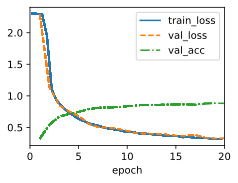

In [8]:
# train the model
trainer.fit(model, data)

AlexNet has some disadvantages when it comes to efficiency: the last two hidden layers require matrices of size $6400\times 4096$ and $4096\times 4096$, respectively. This corresponds to 164MB of memory and 81 MFLOPs of computation.

Even though the number of parameters exceeds by far the amount of training data in this experiment, there is hardly any overfitting: training and validation loss are virtually identical throughtout training. This is due to the improved regularization, such as dropout.

## 8.2. Networks Using Blocks (VGG)

The design of neural network architectures has grown progressively more abstract, with researchers moving from thinking in terms of individual neurons to whole layers, and now to blocks, repeating patterns of layers. This has now progressed to researchers using entire trained models to repurpose them for different, albeit related, tasks. Such large pretrained models are typically called *foundation models*.

The idea of using blocks first emerged from the Visual Geometry Group (VGG) at Oxford University, in their eponymously-named *VGG* network.

In [1]:
import torch
import torch.nn as nn

from d2l import torch as d2l

### 8.2.1. VGG Blocks

The basic building block of CNNs in a sequence of the following:
1. a convolutional layer with padding to maintain the resolution
2. a nonlinearity, such as a ReLU
3. a pooling layer such as max-pooling to reduce the resolution

This approach causes the spatial resolution to decrease quite rapidly and imposes a hard limit of $\log_2 d$ convolutional layers on the network before all dimensions ($d$) are used up. For example, in the case of ImageNet, it would be impossible to have more than 8 convoultional layers in this way.

The key idea of VGG network is to use *multiple* convolutions in between downsampling via max-pooling in the form of a block.

For example, the successive application of two $3\times 3$ convolutions touches the same pixels as a single $5\times 5$ convolution does. At the same time, the latter uses approximately as many parameters ($25\cdot c^2$) as three $3\times 3$ convolutions do ($3\cdot 9\cdot c^2$). VGG network also showed that *deep and narrow* networks significantly outperform their shallow counterparts.

Stacking $3\times 3$ convolutions has become a gold standard in later deep networks (a design decision only to be revisited much later in the form of *inception* blocks).

A VGG block consists of a *sequence* of convolutions with $3\times 3$ kernels with padding of 1 (keeping heihgt and width) followed by a $2\times 2$ max-pooling layer with stride of 2 (halving the resolution after each block).

We implement this block as follows:

In [2]:
def vgg_block(num_convs, out_channels):
    '''Define a VGG block
    
    Parameters
    ----------
    num_convs : int
        number of convolutional layers in the block
    out_channels : int
        number of output channels in the block

    Returns
    -------
    nn.Sequential
        a VGG block
    '''
    layers = []
    for _ in range(num_convs):
        layers.append(
            nn.LazyConv2d(out_channels, kernel_size=3, padding=1)
        )
        layers.append(nn.ReLU())

    layers.append(nn.MaxPool2d(kernel_size=2, stride=2))

    return nn.Sequential(*layers)

### 8.2.2. VGG Network

Similar to LeNet and AlexNet, the VGG network can be partitioned into two parts:
1. the first part containing convolutional and max-pooling layers
2. the second part containing fully-connected layers

The convolutional layers in VGG are grouped in nonlinear transformations that leave the dimensionality unchanged, followed by a resolution-reduction step, as shown in the figure below.

![](../imgs/ch08/vgg.svg)

The convolutional part of the network connects several VGG blocks in succession. This grouping of convolutions is a pattern that has remained almost unchanged over the past decade.

When we implement the `VGG` class, the variable `arch` consists of a list of tuples (one per block), where each contains two values: the number of convolutional layers and the number of output channels, which are precisely the arguments required to call the `vgg_block` function. As such, VGG defines a *family* of networks rather than a single network.

In [3]:
class VGG(d2l.Classifier):
    def __init__(self, arch, lr=0.1, num_classes=10):
        '''Define a VGG model'''
        super().__init__()
        self.save_hyperparameters()

        # define the convolutional blocks
        conv_blocks = []
        for (num_convs, out_channels) in arch:
            conv_blocks.append(
                vgg_block(num_convs, out_channels)
            )
            
        # define the fully connected layers
        self.net = nn.Sequential(
            *conv_blocks,
            nn.Flatten(),
            nn.LazyLinear(4096),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.LazyLinear(4096),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.LazyLinear(num_classes)
        )

        # initialize weights
        self.net.apply(d2l.init_cnn)

The original VGG network had five convolutional blocks, among which the first two have one convolutional layer each and the latter three contain two convolutional layers each. The first block has 64 output channels and each subsequent block doubles the number of output channels, until that number reaches 512. Since this network uses eight convolutional layers and three fully connected layers, it is often called VGG-11.

In [5]:
VGG(arch=(
    (1, 64), # 1st vgg block with 64 output channels
    (1, 128), # 2nd vgg block with 128 output channels
    (2, 256), # 3rd vgg block with 256 output channels
    (2, 512), # 4th vgg block with 512 output channels
    (2, 512) # 5th vgg block with 512 output channels
    )
).layer_summary((1, 1, 224, 224))

Sequential output shape:	 torch.Size([1, 64, 112, 112])
Sequential output shape:	 torch.Size([1, 128, 56, 56])
Sequential output shape:	 torch.Size([1, 256, 28, 28])
Sequential output shape:	 torch.Size([1, 512, 14, 14])
Sequential output shape:	 torch.Size([1, 512, 7, 7])
Flatten output shape:	 torch.Size([1, 25088])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 10])


We halve height and width at each block, finally reaching a height and width of 7 before flattening the representations for processing by the fully-connected layer.

### 8.2.3. Training

Since VGG-11 is computationally more demanding than AlexNet we construct a network with a smaller number of channels. This is more than sufficient for training on Fashion-MNIST.

In [6]:
# load data
data = d2l.FashionMNIST(batch_size=128, resize=(224, 224))

In [7]:
# create model
model = VGG(
    arch=(
        (1, 64), # 1st vgg block with 64 output channels
        (1, 128), # 2nd vgg block with 128 output channels
        (2, 256), # 3rd vgg block with 256 output channels
        (2, 512), # 4th vgg block with 512 output channels
        (2, 512) # 5th vgg block with 512 output channels
    ),
    lr=0.01,
    num_classes=10
)

# create a trainer
trainer = d2l.Trainer(max_epochs=20, num_gpus=1)

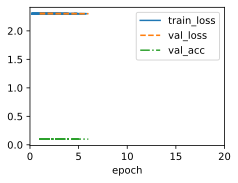

In [8]:
# train the model
trainer.fit(model, data)

More recently ParNet demonstrated that it is possible to achieve competitive performance using a much more shallow architecture through a large number of parallel computations.

## 8.3. Network in Network (NiN)

LeNet, AlexNet, and VGG all share a common design pattern: extract features exploiting *spatial* structure via a sequence of convolutions and pooling layers and post-process the representations via fully connected layers.

This design poses two major challenges:
1. the fully connected layers at the end of the architecture consume tremendous numbers of parameters.
2. it is equally impossible to add fully connected layers earlier in the network to increase the degree of nonlinearity: doing so would destroy the spatial structure and require potentially even more memory.

The *network in network* (NiN) blocks offer an alternative, capable of solving both problems in one simple strategy:
1. use $1\times 1$ convolutions to add local nonlinearities across the channel activations, and
2. use global average pooling to integrate across all locations in the last representation layer.

In [1]:
import torch
import torch.nn as nn

from d2l import torch as d2l

### 8.3.1. NiN Blocks

Recall that the inputs and outputs of convolutional layers consist of four-dimensional tensors with axes corresponding to the `example`, `channel`, `height`, and `width`.

Also recall that the inputs and outputs of fully connected layers are typically two-dimensional tensors corresponding to the `example` and `feature`.

The idea behind NiN is to apply a fully connected layer at each pixel location (for each height and width). The resulting $1\times 1$ convolution can be thought of as a fully connected layer acting independently on each pixel location.

The figure below illustrates the main structural differences between VGG and NiN, and their blocks. Note both the difference in the NiN blocks (the initial convolution is followed by $1\times 1$ convolutions, whereas VGG retains $3\times 3$ convolutions) and at the end where we no longer require a gaint fully connected layer.

![](../imgs/ch08/nin.svg)

We now implement the NiN block as follows:

In [2]:
def nin_block(out_channels, kernel_size, strides, padding):
    '''Define a NiN block

    Parameters
    ----------
    out_channels : int
        number of output channels in the block
    kernel_size : int
        size of the convolutional kernel
    strides : int
        stride of the convolutional kernel
    padding : int
        padding of the convolutional kernel

    Returns
    -------
    nn.Sequential
        a NiN block
    '''
    layers = [
        nn.LazyConv2d(out_channels, kernel_size, strides, padding),
        nn.ReLU(),
        nn.LazyConv2d(out_channels, kernel_size=1), # 1x1 convolution
        nn.ReLU(),
        nn.LazyConv2d(out_channels, kernel_size=1), # 1x1 convolution
        nn.ReLU()
    ]

    return nn.Sequential(*layers)

### 8.3.2. NiN Model

NiN uses the same initial convolution sizes as AlexNet. The kernel sizes are $11\times 11$, $5\times 5$, and $3\times 3$, respectively, and the numbers of output channels match those of AlexNet. Each NiN block is followed by a max-pooling layer with a stride of 2 and a window shape of $3\times 3$.

NiN uses a NiN block with a number of output channels equal to the number of label classes, followed by a *global average pooling* layer, yelding a vector of logits. This design significantly reduces the number of required model parameters, albeit at the cost of a potential increase in training time.

In [3]:
class NiN(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        '''Define a NiN model'''
        super().__init__()
        self.save_hyperparameters()

        self.net = nn.Sequential(
            nin_block(96, kernel_size=11, strides=4, padding=0), # 1st nin block
            nn.MaxPool2d(kernel_size=3, stride=2),
            nin_block(256, kernel_size=5, strides=1, padding=2), # 2nd nin block
            nn.MaxPool2d(kernel_size=3, stride=2),
            nin_block(384, kernel_size=3, strides=1, padding=1), # 3rd nin block
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Dropout(p=0.5),

            nin_block(num_classes, kernel_size=3, strides=1, padding=1), # last nin block
            nn.AdaptiveAvgPool2d((1, 1)), # global average pooling
            nn.Flatten() # flatten the output
        )

        # initialize weights
        self.net.apply(d2l.init_cnn)

In [5]:
# check the output shape of each block
NiN().layer_summary((1, 1, 224, 224))

Sequential output shape:	 torch.Size([1, 96, 54, 54])
MaxPool2d output shape:	 torch.Size([1, 96, 26, 26])
Sequential output shape:	 torch.Size([1, 256, 26, 26])
MaxPool2d output shape:	 torch.Size([1, 256, 12, 12])
Sequential output shape:	 torch.Size([1, 384, 12, 12])
MaxPool2d output shape:	 torch.Size([1, 384, 5, 5])
Dropout output shape:	 torch.Size([1, 384, 5, 5])
Sequential output shape:	 torch.Size([1, 10, 5, 5])
AdaptiveAvgPool2d output shape:	 torch.Size([1, 10, 1, 1])
Flatten output shape:	 torch.Size([1, 10])


### 8.3.3. Training

In [6]:
# load data
data = d2l.FashionMNIST(batch_size=128, resize=(224, 224))

In [7]:
# create model
model = NiN(lr = 0.05, num_classes=10)

# create a trainer
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
# initialize weights
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)

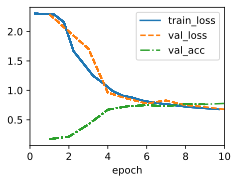

In [8]:
# train the model
trainer.fit(model, data)

NiN has dramatically fewer parameters than AlexNet and VGG. This stems primarily from the fact that it needs no giant fully connected layers. Instead, it uses global average pooling to aggregate across all image locations after the last stage of the network body.

Choosing fewer convolutions with wide kernels and replacing them by $1\times 1$ convolutions aids the quest for fewer parameters further. It can cater for a significant amount of nonlinearity across channels without any given location. Both $1\times 1$ convolutions and global average pooling significantly influenced subsequent designs of convolutional neural networks.

## 8.4. Multi-Branch Networks (GoogLeNet)

In 2014, *GoogLeNet* won the ImageNet Challenge, proposing a structure that combined the strengths of the NiN and repeated blocks, and a cocktail of convolution kernels.

GoogLeNet exhibits a clear distinction among the stem (data ingest), boday (data processing), and head (prediction) in a CNN. The *stem* is given by the first two or three convolutions that operates on the image. They extract low-level features from the underlying images. This is followed by a *body* of convolutional blocks. Finally, the *head* maps the features obtained so far to the required classification, segmentation, detection, or tracking problem at hand.

GoogLeNet solved the problem of selecting convolution kernels by simply *concatenating* multi-branch convolutions.

In [1]:
import torch
import torch.nn as nn
from torch.nn import functional as F

from d2l import torch as d2l

### 8.4.1. Inception Blocks

The basic convolutional block in GoogLeNet is called an *Inception block*.

![](../imgs/ch08/inception.svg)

The inception block consists of four parallel branches. 
* The first three branches use convolutional layers with window size of $1\times 1$, $3\times 3$, and $5\times 5$ to extract information from different spatial sizes. 
* The middle two branches also add a $1\times 1$ convolution of the input to reduce the number of channels, reducing the model's complexity. 
* The fourth branch uses a $3\times 3$ max-pooling layer, following by a $1\times 1$ convolutional layer to change the number of channels.

All four branches use appropriate padding to give the input and output the same height and width. Finally, the outputs along each branch are concatenated along the channel dimension and comprise the block's output.

We now implement the Inception block:

In [2]:
class Inception(nn.Module):
    def __init__(self, c1, c2, c3, c4, **kwargs):
        '''Define an Inception block
        
        Parameters
        ----------
        c1 : int
            number of output channels of the first branch
        c2 : list
            number of output channels of the second branch
        c3 : list
            number of output channels of the third branch
        c4 : int
            number of output channels of the fourth branch
        '''
        super(Inception, self).__init__(**kwargs)

        # Branch 1
        self.b1_1 = nn.LazyConv2d(c1, kernel_size=1)
        # Branch 2
        self.b2_1 = nn.LazyConv2d(c2[0], kernel_size=1)
        self.b2_2 = nn.LazyConv2d(c2[1], kernel_size=3, padding=1)
        # Branch 3
        self.b3_1 = nn.LazyConv2d(c3[0], kernel_size=1)
        self.b3_2 = nn.LazyConv2d(c3[1], kernel_size=5, padding=2)
        # Branch 4
        self.b4_1 = nn.MaxPool2d(kernel_size=3, stride=1, padding=1)
        self.b4_2 = nn.LazyConv2d(c4, kernel_size=1)

    def forward(self, x):
        # Branch 1
        b1 = F.relu(self.b1_1(x))
        # Branch 2
        b2 = F.relu(self.b2_1(x))
        b2 = F.relu(self.b2_2(b2))
        # Branch 3
        b3 = F.relu(self.b3_1(x))
        b3 = F.relu(self.b3_2(b3))
        # Branch 4
        b4 = self.b4_1(x)
        b4 = F.relu(self.b4_2(b4))

        # Concatenate the outputs on the channel dimension
        out = torch.cat((b1, b2, b3, b4), dim=1)

        return out

These branches can be thought of as filters. They explore the image in a variety of filter sizes. This means that details at differnt extents can be recognized efficiently by filters of differnt sizes. At the same time, we can use allocate different amounts of parameters for different filters.

### 8.4.2. GoogLeNet Model

![](../imgs/ch08/inception-full-90.svg)

GoogLeNet uses a stack of a total of 9 inception blocks, arranged in to three groups with max-pooling in between, and global average pooling in its head to generate its estimates. Max-pooling between inception blocks reduces the dimensionality. At its stem, the first module is similar to AlexNet and LeNet.

We can now implement GoogLeNet piece by piece. Let's begin with the stem. The first module uses a 64-channel $7\times 7$ convolutional layer:

In [3]:
class GoogleNet(d2l.Classifier):
    def b1(self):
        return nn.Sequential(
            nn.LazyConv2d(64, kernel_size=7, stride=2, padding=3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        )

The second module uses two convolutional layers: first, a 64-channel $1\times 1$ convolutional layer, followed by a $3\times 3$ convolutional layer that triples the number of channels. This corresponds to the second branch in the Inception block and concludes the design of the body:

In [4]:
@d2l.add_to_class(GoogleNet)
def b2(self):
    return nn.Sequential(
        nn.LazyConv2d(64, kernel_size=1),
        nn.ReLU(),
        nn.LazyConv2d(64*3, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
    )

The third module connects two complete Inception blocks in series. 

The number of output channels of the *second module* is $64\times 3= 192$. The number of output channels of the *first Inception block* is $64+128+32+32=256$. This amounts to a ratio of the number of output channels among the four branches of $64:128:32:32=2:4:1:1$.To achieve this, we first reduce the input dimensions of the first inception block by $\frac{1}{2}$ in the second branch and by $\frac{1}{12}$ in the third branch, respectively, to arrive at $96 = 192/2$ channels in the second branch and $16 = 192/12$ channels in the third branch, respectively.

Recall that he number of output channels of the *first Inception block* is 256.  The number of output channels of the *second Inception block* is increased to $128+192+96+64=480$, by the ratio of $128:192:96:64 = 4:6:3:2$. As before, we need to reduce the number of intermediate dimensions in the second and third channels. A scale of $\frac{1}{2}$ and $\frac{1}{8}$ respectively suffices, yielding $128 = 256/2$ channels in the second branch and $32 = 256/8$ channels in the third branch respectively.

In [5]:
@d2l.add_to_class(GoogleNet)
def b3(self):
    return nn.Sequential(
        # first inception block
        Inception(64, 
                  (96, 128),  
                  (16, 32),  
                  32),
        # second inception block
        Inception(128, 
                  (128, 192),
                  (32, 96),
                  64),
        nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
    )

The fourth module connects five Inception blocks in series, and they have 
1. $192+208+48+64=512$, 
2. $160+224+64+64=512$, 
3. $128+256+64+64=512$, 
4. $112+288+64+64=528$, and 
5. $256+320+128+128=832$ output channels, respectively.

The number of channels assigned to these branches is similar to that in the third module: the second branch with the $3\times 3$ convolution outputs the largest number of channels, followed by the first branch with only the $1\times 1$ convolutional layer, the third branch with the $5\times 5$ convolutional layer, and the fourth branch with the $3\times 3$ max-pooling layer. The second and third branches will first reduce the number of channels according to the ratio. These ratios are slightly different in different Inception blocks:

In [6]:
@d2l.add_to_class(GoogleNet)
def b4(self):
    return nn.Sequential(
        Inception(192, 
                  (96, 208),
                  (16, 48),
                  64),

        Inception(160,
                  (112, 224),
                  (24, 64),
                  64),

        Inception(128,
                  (128, 256),
                  (24, 64),
                  64),

        Inception(112,
                  (144, 288),
                  (32, 64),
                  64),

        Inception(256,
                  (160, 320),
                  (32, 128),
                  128),

        nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
    )

The fifth module has two Inception blocks with $256+320+128+128=832$ and $384+384+128+128=1024$ output channels. The number of channels assigned to each branch is the same as that in the third and fourth modules, but differs in specific values. 

The fifth block is followed by the output layer. This block uses the global average pooling layer to change the height and width of each channel to 1, just as in NiN. Finally, we turn the output into a two-dimensional array followed by a fully-connected layer whose number of outputs is the number of label classes:

In [7]:
@d2l.add_to_class(GoogleNet)
def b5(self):
    return nn.Sequential(
        Inception(256,
                  (160, 320),
                  (32, 128),
                  128),

        Inception(384,
                  (192, 384),
                  (48, 128),
                  128),

        nn.AdaptiveAvgPool2d((1,1)),
        nn.Flatten()
    )

Now we assemble them all into a full netowrk:

In [8]:
@d2l.add_to_class(GoogleNet)
def __init__(self, lr=0.1, num_classes=10):
    super(GoogleNet, self).__init__()
    self.save_hyperparameters()

    self.net = nn.Sequential(
        self.b1(),
        self.b2(),
        self.b3(),
        self.b4(),
        self.b5(),
        nn.LazyLinear(num_classes)
    )

    # initialize weights
    self.net.apply(d2l.init_cnn)

The full implemented GoogLeNet model is as follows:

In [ ]:
class GoogleNet(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        '''Define a GoogleNet model'''
        super(GoogleNet, self).__init__()
        self.save_hyperparameters()

        self.net = nn.Sequential(
            self.b1(),
            self.b2(),
            self.b3(),
            self.b4(),
            self.b5(),
            nn.LazyLinear(num_classes)
        )

        # initialize weights
        self.net.apply(d2l.init_cnn)


    def b1(self):
        return nn.Sequential(
            nn.LazyConv2d(64, kernel_size=7, stride=2, padding=3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        )
    
    def b2(self):
        return nn.Sequential(
            nn.LazyConv2d(64, kernel_size=1),
            nn.ReLU(),
            nn.LazyConv2d(64*3, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        )
    
    def b3(self):
        return nn.Sequential(
            # first inception block
            Inception(64, 
                    (96, 128),  
                    (16, 32),  
                    32),
            # second inception block
            Inception(128, 
                    (128, 192),
                    (32, 96),
                    64),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        )
    
    def b4(self):
        return nn.Sequential(
            Inception(192, 
                    (96, 208),
                    (16, 48),
                    64),

            Inception(160,
                    (112, 224),
                    (24, 64),
                    64),

            Inception(128,
                    (128, 256),
                    (24, 64),
                    64),

            Inception(112,
                    (144, 288),
                    (32, 64),
                    64),

            Inception(256,
                    (160, 320),
                    (32, 128),
                    128),

            nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        )
    
    def b5(self):
        return nn.Sequential(
            Inception(256,
                    (160, 320),
                    (32, 128),
                    128),

            Inception(384,
                    (192, 384),
                    (48, 128),
                    128),

            nn.AdaptiveAvgPool2d((1,1)),
            nn.Flatten()
        )

The GoogLeNet model is computaionally complex. The large number of relatively arbitrary hyperparameters in terms of the number of channels chosen, the number of blocks prior to dimensionality reduction, the relative partitioning of capacity across channels, etc.

For now the only modification we will carry out is to reduce the input height and width from 224 to 96 to have a reasonable training time on Fashion-MNIST. This simplifies the computation.

In [10]:
GoogleNet().layer_summary((1, 1, 96, 96))

Sequential output shape:	 torch.Size([1, 64, 24, 24])
Sequential output shape:	 torch.Size([1, 192, 12, 12])
Sequential output shape:	 torch.Size([1, 480, 6, 6])
Sequential output shape:	 torch.Size([1, 832, 3, 3])
Sequential output shape:	 torch.Size([1, 1024])
Linear output shape:	 torch.Size([1, 10])


### 8.4.3. Training

We will transform the Fashion-MNIST dataset to $96\times 96$ pixel resolution before training.

In [11]:
# load data
data = d2l.FashionMNIST(batch_size=128, resize=(96, 96))

# create model
model = GoogleNet(lr=0.01, num_classes=10)
# apply weight initialization
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
# create a trainer
trainer = d2l.Trainer(max_epochs=20, num_gpus=1)

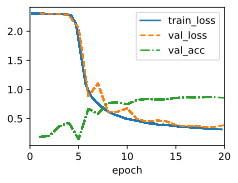

In [12]:
# train the model
trainer.fit(model, data)

A key feature of GoogLeNet is that it is actually *cheaper* to compute than its predecessors while simultaneously providing improved accuracy. 

This marks the beginning of a much more deliberate network design that trades off the cost of evaluating a network with a reduction in errors. It also marks the beginning of experimentation at a block level with network design hyperparameters.

## 8.5. Batch Normalization

In [3]:
import torch
import torch.nn as nn

from d2l import torch as d2l

### 8.5.1. Training Deep Networks

When working with data, we often preprocess before training. Recall that the MLP application requires that we normalize input features to have zero mean and unit variance across multiple observatoins. Another strategy is to rescale vectors to unit length, possibly zero mean *per observation*. Standardizing vectors also has nice side-effect of constraining the function complexity of functions that act upon it.

Intuitively, this standardization plays nicely with our optimizers since it puts the parameters *a priori* on a similar scale. Second, for a typical MLP or CNN, as we train, the variables in intermediate layers may take values with widely varying magnitudes: whether along the layers from the input to the output, across units in the same layer, and over time due to our updates to the model parameters. Third, deeper networks are complex and tend to be more liable to overfitting. This means that regularization becomes more critical. A common technique for regularization is noise injection. 

**Batch normalization** is applied to individual layers, or optionally, to all of them: In each training iteration, we first normalize the inputs (of batch normalization) by subtracting their mean and dividing by their standard deviation, where both are estimated based on the statistics of the current minibatch. Next, we apply a scale coefficient and an offset to recover the lost degrees of freedom. It is precisely due to this *normalization* based on *batch statistics* that *batch normalization* derives its name.

Note: If we try to apply batch normalization with minibatches of size 1, we cannot learn anything. That is because after subtracting the means, each hidden unit would take value 0!

When applying batch normalization, the choice of batch size is even more significant than without batch normalization, or at least, suitable calibration is needed as we may adjust batch size.

Denote by $\mathcal{B}$ a minibatch and let $\mathbf{x}\in\mathcal{B}$ be an input to batch normalization (BN). The batch normalization is defined as follows:
\begin{split}
\textrm{BN}(\mathbf{x}) = \boldsymbol{\gamma} \odot \frac{\mathbf{x} - \hat{\boldsymbol{\mu}}_\mathcal{B}}{\hat{\boldsymbol{\sigma}}_\mathcal{B}} + \boldsymbol{\beta}
\end{split}
where $\hat{\boldsymbol{\mu}}_\mathcal{B}$ is the sample mean and $\hat{\boldsymbol{\sigma}}_\mathcal{B}$ is the sample standard deviation of the minibatch $\mathcal{B}$, respectively. After applying standardization, the resulting minibatch has zero mean and unit variance. The choice of unit variance is arbitrary but we recover this degree of freedom by including an elementwise *scale parameter* $\boldsymbol{\gamma}$ and a *shift parameter* $\boldsymbol{\beta}$ that have the same shape as $\mathbf{x}$. Both are parameters that need to be learned as part of model training.

The variable magnitudes for intermediate layers cannot diverge during training since batch normalization actively centers and rescales them back to a given mean and size (via $\hat{\boldsymbol{\mu}}_\mathcal{B}$ and $\hat{\boldsymbol{\sigma}}_\mathcal{B}$). Batch normalization allows for more aggressive learning rates and we can calculate $\hat{\boldsymbol{\mu}}_\mathcal{B}$ and $\hat{\boldsymbol{\sigma}}_\mathcal{B}$ as follows:
\begin{split}
\hat{\boldsymbol{\mu}}_\mathcal{B} = \frac{1}{|\mathcal{B}|} \sum_{\mathbf{x} \in \mathcal{B}} \mathbf{x}
\textrm{ and }
\hat{\boldsymbol{\sigma}}_\mathcal{B}^2 = \frac{1}{|\mathcal{B}|} \sum_{\mathbf{x} \in \mathcal{B}} (\mathbf{x} - \hat{\boldsymbol{\mu}}_{\mathcal{B}})^2 + \epsilon
\end{split}
where $\epsilon > 0$ is a constant that ensures we never attempt division by zero, even in cases where the empirical variance estimate might be very small or vanish.

Batch normalization works best for moderate minibatch sizes in the 50–100 range. This particular size of minibatch seems to inject just the “right amount” of noise per layer, both in terms of scale via $\hat{\boldsymbol{\sigma}}_\mathcal{B}$ and in terms of offset via $\hat{\boldsymbol{\mu}}_\mathcal{B}$: a larger minibatch regularizes less due to the more stable estimates, whereas tiny minibatches destroy useful signal due to high variance.

Batch normalization layers function differently in *training mode* (normalizing by minibatch statistics) than in *prediction mode* (normalizing by dataset statistics). In this form they closely resemble the behavior of dropout regularization where noise is only injected during training.

### 8.5.2. Batch Normalization Layers

Batch normalization implementations for fully connected layers and convolutional layers are slightly different. We cannot ignore the batch dimensions as we did before when introducing other layers.

#### 8.5.2.1. Fully Connected Layers

When applying batch normalization to fully connected layers, we typically insert batch normalization layers after the affine transformation and *before* the nonlinear activation function.

Denoting the input to the fully connected layer by $\mathbf{x}$, the affine transformation by $\mathbf{W}\mathbf{x} + \mathbf{b}$ (with the weight parameter $\mathbf{W}$ and the bias parameter $\mathbf{b}$), and the activation function by $\phi$, we can express the computation of a batch-normalization-enabled, fully-connected layer output $\mathbf{h}$ as follows:
\begin{split}
\mathbf{h} = \phi(\textrm{BN}(\mathbf{W}\mathbf{x} + \mathbf{b}) )
\end{split}
where the mean and variance are computed on the same minibatch $\mathcal{B}$ on which the transformation is applied.

#### 8.5.2.2. Convolutional Layers

With convolutional layers, we still apply batch normalization *after* the convolutional transformation but before the nonlinear activation function.

In fully connected layers, we apply batch normalization on a per-channel basis *across all locations*.

Assume that our minibatches contain $m$ examples and that for each channel, the output of the convolution has height $p$ and width $q$. For convolutional layers, we carry out each batch normalization over the $m\cdot p\cdot q$ elements per output channel simultaneously.

Therefore, we collect the values over all spatial locations when computing the mean and variance, and consequently apply the same mean and variance within a given channel to normalize the value at each spatial location. Each channel has its own scale and shift parameters, both of which are scalars.

#### 8.5.2.3. Layer Normalization

Unlike the fully connected operations, the batch normalization in convolutions is well defined even for minibatches of size 1: after all, we have all the locations across an image to average. Consequently, mean and variance are well defined, even if it is just within a single observation. This has led to the development of *layer normalization*.

*Layer normalization* works just like a batch norm, only that it is applied to one observation at a time. Consequently both the offset and the scaling factor are scalars.

For an $n$-dimensional vector $\mathbf{x}$, layer norms are given by
\begin{split}
\mathbf{x} \rightarrow \textrm{LN}(\mathbf{x}) =  \frac{\mathbf{x} - \hat{\mu}}{\hat\sigma}
\end{split}
where scaling and offset are applied coefficient-wise and given by
\begin{split}
\hat{\mu} \stackrel{\textrm{def}}{=} \frac{1}{n} \sum_{i=1}^n x_i \textrm{ and }
\hat{\sigma}^2 \stackrel{\textrm{def}}{=} \frac{1}{n} \sum_{i=1}^n (x_i - \hat{\mu})^2 + \epsilon
\end{split}
where $\epsilon > 0$ is a constant to prevent division by zero.

One of the major benefits of using layer normalization is that it prevents divergence. Ignoring $\epsilon$, the output of the layer normalization is scale independent. That is, $\textrm{LN}(\mathbf{x}) \approx \textrm{LN}(\alpha \mathbf{x})$ for any $\alpha\neq 0$. This becomes an equality for $|\alpha|\leftarrow \infty$. 

Another advantage of the layer normalization is that it does not depend on the minibatch size. It is also independent of whether we are in training or test regime.

#### 8.5.2.4. Batch Normalization During Prediction

1. The noise in the sample mean and the sample variance arising from estimating each on minibatches is no longer desirable once we have trained the model.
2. We may not have the luxury of computing per-batch normalization statistics.

### 8.5.3. Implementation from Scratch

In [4]:
def batch_norm(X, gamma, beta, moving_mean, moving_var, eps, momentum):
    # Use torch.is_grad_enabled() to determine whether we are in training mode
    if not torch.is_grad_enabled():
        # In prediction mode, use mean and variance obtained by moving average
        X_hat = (X - moving_mean) / torch.sqrt(moving_var + eps)

    else:
        assert len(X.shape) in (2, 4)
        if len(X.shape) == 2:
            # When using a fully connected layer,
            # calculate the mean and variance on the feature dimension
            mean = X.mean(dim=0)
            var = ((X - mean) ** 2).mean(dim=0)
        else:
            # When using a 2D convolutional layer,
            # calculate the mean and variance on the channel dimension (dim=1).
            # We need to maintain the shape of X, so that 
            # the broadcast operation can be carried out later
            mean = X.mean(dim=(0, 2, 3), keepdim=True)
            var = ((X - mean) ** 2).mean(dim=(0, 2, 3), keepdim=True)

        # In training mode, calculate the mean and variance on the current batch
        X_hat = (X - mean) / torch.sqrt(var + eps)
        # Update the mean and variance using moving average
        moving_mean = (1. - momentum) * moving_mean + momentum * mean
        moving_var = (1. - momentum) * moving_var + momentum * var

    Y = gamma * X_hat + beta # Scale and shift

    return Y, moving_mean.data, moving_var.data

We now will implement a batch normalization layer with proper parameters for scale `gamma` and shift `beta`, both of which are learnable parameters. Additionally, our batch normalization layer will maintain moving averages of the means and variances for subsequent use during model prediction.

The design pattern underlying the `BatchNorm` class allows us to define the mathematics in a separate function, `batch_norm`, and then we can integrate this functionality into a custom layer, whose code mostly addresses bookkeeping matters, such as moving data to the right device context, allocating and initializing any required variables, keeping track of the moving averages for mean and variance, and so on. This pattern enables a clean separation of mathematics from boilerplate code.

In [5]:
class BatchNorm(nn.Module):
    def __init__(self, num_features, num_dims):
        '''Define a batch normalization layer
        
        Parameters
        ----------
        num_features : int
            the number of outputs for a fully connected layer or 
            the number of output channels for a convolutional layer.
        num_dims : int
            2 for a fully connected layer and 4 for a convolutional layer.
        '''
        super().__init__()

        if num_dims == 2:
            # fully connected layer
            shape = (1, num_features)
        else:
            # convolutional layer
            shape = (1, num_features, 1, 1)

        # The scale parameter and the shift parameter (model parameters) are 
        # initialized to 1 and 0, respectively
        self.gamma = nn.Parameter(torch.ones(shape))
        self.beta = nn.Parameter(torch.zeros(shape))

        # Variables that are not model parameters are initialized to 0 and 1
        self.moving_mean = torch.zeros(shape)
        self.moving_var = torch.ones(shape)

    def forward(self, X):
        # If X is not on the main memory, copy moving_mean and moving_var 
        # to the device where X is located
        if self.moving_mean.device != X.device:
            self.moving_mean = self.moving_mean.to(X.device)
            self.moving_var = self.moving_var.to(X.device)

        # save the updated moving_mean and moving_var
        Y, self.moving_mean, self.moving_var = batch_norm(
            X=X,
            gamma=self.gamma,
            beta=self.beta,
            moving_mean=self.moving_mean,
            moving_var=self.moving_var,
            eps=1e-5,
            momentum=0.1
        )

        return Y

We used `mementum` to govern the aggregation over past mean and variance estimates.

### 8.5.4. LeNet with Batch Normalization

We can apply our `BatchNorm` to a traditional LeNet model. Recall that batch normalization is applied after the convolutional layer or fully connected layer but before the corresponding activation functions.

In [6]:
class BNLeNetScratch(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        '''Define a LeNet model with batch normalization'''
        super().__init__()
        self.save_hyperparameters()

        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size=5),
            BatchNorm(6, num_dims=4),
            nn.Sigmoid(),
            nn.AvgPool2d(kernel_size=2, stride=2),

            nn.LazyConv2d(16, kernel_size=5),
            BatchNorm(16, num_dims=4),
            nn.Sigmoid(),
            nn.AvgPool2d(kernel_size=2, stride=2),

            nn.Flatten(),
            nn.LazyLinear(120),
            BatchNorm(120, num_dims=2),
            nn.Sigmoid(),
            nn.LazyLinear(84),
            BatchNorm(84, num_dims=2),
            nn.Sigmoid(),
            nn.LazyLinear(num_classes)
        )

In [8]:
# load FashionMNIST data
data = d2l.FashionMNIST(batch_size=128) # keep batch size small for batch norm

# create model
model = BNLeNetScratch(lr=0.1, num_classes=10)
# initialize weights
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
# create a trainer
trainer = d2l.Trainer(max_epochs=20, num_gpus=1)

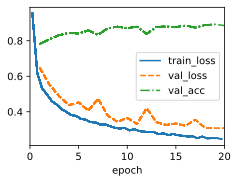

In [9]:
# train the model
trainer.fit(model, data)

In [10]:
# we can check the mean and variance of the first batch
model.net[1].gamma.reshape((-1,)), model.net[1].beta.reshape((-1,))

(tensor([2.3827, 2.2241, 3.1391, 2.3836, 1.5640, 1.1645], device='cuda:0',
        grad_fn=<ReshapeAliasBackward0>),
 tensor([ 2.0886,  1.2243, -2.0188,  0.0218, -0.9888,  1.0745], device='cuda:0',
        grad_fn=<ReshapeAliasBackward0>))

### 8.5.5. Concise Implementation

In [11]:
class BNLeNet(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()

        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size=5),
            nn.LazyBatchNorm2d(),
            nn.Sigmoid(),
            nn.AvgPool2d(kernel_size=2, stride=2),

            nn.LazyConv2d(16, kernel_size=5),
            nn.LazyBatchNorm2d(),
            nn.Sigmoid(),
            nn.AvgPool2d(kernel_size=2, stride=2),

            nn.Flatten(),
            nn.LazyLinear(120),
            nn.LazyBatchNorm1d(),
            nn.Sigmoid(),
            nn.LazyLinear(84),
            nn.LazyBatchNorm1d(),
            nn.Sigmoid(),
            nn.LazyLinear(num_classes)
        )

In [12]:
# load FashionMNIST data
data = d2l.FashionMNIST(batch_size=128) # keep batch size small for batch norm

# create model
model = BNLeNet(lr=0.1, num_classes=10)
# initialize weights
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
# create a trainer
trainer = d2l.Trainer(max_epochs=20, num_gpus=1)

c:\Users\User\anaconda3\envs\d2l-env\lib\site-packages\torch\nn\modules\lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


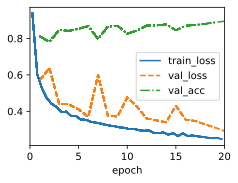

In [13]:
# train the model
trainer.fit(model, data)

The original paper proposing batch normalization explains why batch normalization works: by reducing *internal covariate shift*. The *internal covariate shift* is defined as the change in the distribution of network activations due to the change in network parameters during training. Batch normalization has proven an indispensable method, applied in nearly all deployed image classifiers.

## 8.6. Residual Networks (ResNet) and ResNeXt

In [14]:
import torch
from torch import nn
from torch.nn import functional as F

from d2l import torch as d2l

### 8.6.1. Function Classes

Consider $\mathcal{F}$, the class of functions that a specific network architecture (together with learning rates and other hyperparameter settings) can reach. That is, for all $f\in\mathcal{F}$ there exists some set of parameters (e.g., weights and biases) that can be obtained through training on a suitable dataset.

Assume that $f^*$ is the "truth" function that we really would like to find. If it is in $\mathcal{F}$, we are in good shape but typically we will not be quite so lucky. Instead, we will try to find some $f^*_\mathcal{F}$ which is our best bet within $\mathcal{F}$. For instance, given a dataset with features $\mathbf{X}$ and labels $\mathbf{y}$, we might try finding it by solving the following optimization problem:
\begin{split}
f^*_\mathcal{F} \stackrel{\textrm{def}}{=} \mathop{\mathrm{argmin}}_f L(\mathbf{X}, \mathbf{y}, f) \textrm{ subject to } f \in \mathcal{F}
\end{split}

Regularization may control complexity of the function class $\mathcal{F}$, so a large size of training data generally leads to better $f^*_\mathcal{F}$.  If we design a different and more powerful architecture $\mathcal{F}'$, we should arrive at a better outcome $f^*_{\mathcal{F}'}$ which is "better" than $f^*_{\mathcal{F}}$. However, if $\mathcal{F}' \not\supset \mathcal{F}$, there is no guarantee that this should even happen. 

For example, $f^*_{\mathcal{F}'}$ might be worse. In the figure below, for non-nested function classes on the left, a larger function class does not always move closer to the "truth" function $f^*$, such that $\mathcal{F}_3$ is closer to $f^*$ than $\mathcal{F}_1$, but $\mathcal{F}_6$ moves away and there is no guarantee that further increasing the complexity can reduce the distance from $f^*$. On the other hand, with nested function classes where $\mathcal{F}_1 \subset \cdots \subset \mathcal{F}_6$ on the right of the figure, we can see that increasing the complexity of the function class strictly moves us closer to the "truth" function $f^*$.

![](../imgs/ch08/functionclasses.svg)

Therefore, only if larger function classes contain the smaller ones are we guaranteed that increasing the complexity strictly increases the expressive power of the network.

For deep neural networks, if we can train the newly-added layer into an identity function $f(\mathbf{x}) = \mathbf{x}$, the new model will be as effective as the original model. As the new model may get a better solution to fit the trianing dataset, the added layer might make it easier to reduce training errors. Even better, since the identity function retains all the information of its inputs, if the new model after adding the identity function can still access the solution of the original model, then the training error of the new model will not be higher than the original model. 

The idea behind the *residual block* is that every additional layer should more easily contain the identity function as one of its elements.

### 8.6.2. Residual Blocks